#### **Q11.1)Program to impleament Logistic Regression**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
f=pd.read_csv("./Datasets/toy_data.csv")
new_cols=pd.get_dummies(f["Type"])*1
f=f.drop(["Type"],axis=1)
f=pd.concat([new_cols,f],axis=1)
minmax=MinMaxScaler()
f[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]]=minmax.fit_transform(f[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]])
f=f.drop(["UDI","Product ID"],axis=1)
res=f["Failure Type"]
f=f.drop(["Failure Type"],axis=1)

In [68]:
smote=SMOTE()
x_train,x_test,y_train,y_test=train_test_split(f,res,test_size=0.2)
x_train,y_train=smote.fit_resample(x_train,y_train)
x_test,y_test=smote.fit_resample(x_test,y_test)

In [69]:
from sklearn.linear_model import LogisticRegression
md=LogisticRegression()
md.fit(x_train,y_train)

c:\Users\VICTUS\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.7914057063326374


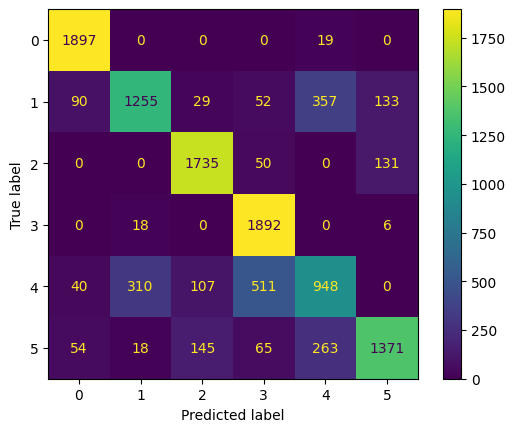

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
pred=md.predict(x_test)
print(accuracy_score(y_test,pred))
confusion_matrix = confusion_matrix(y_test, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()

#### **Q11.2)Program to Demostrate the Possion Regression**

In [2]:
from sklearn.datasets import fetch_california_housing
f=fetch_california_housing(as_frame=True)
fk=f["data"]
res=f["target"]

fk=minmax.fit_transform(fk)

In [8]:
fk

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.00149943, 0.5674814 ,
        0.21115538],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.00114074, 0.565356  ,
        0.21215139],
       [0.46602805, 1.        , 0.05275646, ..., 0.00169796, 0.5642933 ,
        0.21015936],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.0013144 , 0.73219979,
        0.31175299],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.0011515 , 0.73219979,
        0.30179283],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.00154886, 0.72582359,
        0.30976096]])

In [9]:
print(f["target"])

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [10]:
x_train,x_test,y_train,y_test=train_test_split(fk,res,test_size=0.25)

In [11]:

from sklearn.linear_model import PoissonRegressor
md=PoissonRegressor()
import sklearn.preprocessing

md.fit(x_train,y_train)


PoissonRegressor()

In [17]:
from sklearn.metrics import mean_squared_error
pred=md.predict(x_test)
print("Mean Error:",mean_squared_error(y_test,pred))


Mean Error: 1.2932724182884543
